## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9343730	total: 57.4ms	remaining: 57.3s
1:	learn: 0.9175347	total: 58.3ms	remaining: 29.1s
2:	learn: 0.8991434	total: 59.1ms	remaining: 19.7s
3:	learn: 0.8830840	total: 60.2ms	remaining: 15s
4:	learn: 0.8690601	total: 61ms	remaining: 12.1s
5:	learn: 0.8530931	total: 62.1ms	remaining: 10.3s
6:	learn: 0.8374966	total: 62.8ms	remaining: 8.91s
7:	learn: 0.8224426	total: 63.6ms	remaining: 7.89s
8:	learn: 0.8084983	total: 64.5ms	remaining: 7.1s
9:	learn: 0.7933157	total: 65.3ms	remaining: 6.46s
10:	learn: 0.7790899	total: 66.1ms	remaining: 5.94s
11:	learn: 0.7666573	total: 66.9ms	remaining: 5.51s
12:	learn: 0.7520816	total: 67.7ms	remaining: 5.14s
13:	learn: 0.7379539	total: 68.4ms	remaining: 4.82s
14:	learn: 0.7269229	total: 69.3ms	remaining: 4.55s
15:	learn: 0.7156163	total: 70.1ms	remaining: 4.31s
16:	learn: 0.7038287	total: 71ms	remaining: 4.11s
17:	learn: 0.6922388	total: 71.7ms	remaining: 3.91s
18:	learn: 0.6803965	total: 72.5ms	remaining: 3.74s

61:	learn: 0.4042113	total: 109ms	remaining: 1.64s
62:	learn: 0.4003552	total: 110ms	remaining: 1.63s
63:	learn: 0.3967799	total: 110ms	remaining: 1.61s
64:	learn: 0.3929773	total: 111ms	remaining: 1.6s
65:	learn: 0.3898739	total: 112ms	remaining: 1.59s
66:	learn: 0.3867673	total: 113ms	remaining: 1.57s
67:	learn: 0.3841122	total: 114ms	remaining: 1.56s
68:	learn: 0.3810859	total: 115ms	remaining: 1.55s
69:	learn: 0.3779222	total: 115ms	remaining: 1.53s
70:	learn: 0.3746751	total: 116ms	remaining: 1.52s
71:	learn: 0.3722840	total: 117ms	remaining: 1.51s
72:	learn: 0.3694953	total: 118ms	remaining: 1.5s
73:	learn: 0.3663022	total: 119ms	remaining: 1.48s
74:	learn: 0.3638652	total: 120ms	remaining: 1.47s
75:	learn: 0.3621432	total: 120ms	remaining: 1.46s
76:	learn: 0.3595093	total: 121ms	remaining: 1.45s
77:	learn: 0.3568701	total: 122ms	remaining: 1.44s
78:	learn: 0.3544055	total: 123ms	remaining: 1.43s
79:	learn: 0.3524280	total: 124ms	remaining: 1.42s
80:	learn: 0.3507373	total: 124ms

160:	learn: 0.2516257	total: 190ms	remaining: 990ms
161:	learn: 0.2514848	total: 190ms	remaining: 985ms
162:	learn: 0.2505427	total: 191ms	remaining: 982ms
163:	learn: 0.2498659	total: 192ms	remaining: 979ms
164:	learn: 0.2491841	total: 193ms	remaining: 976ms
165:	learn: 0.2486999	total: 194ms	remaining: 974ms
166:	learn: 0.2480544	total: 195ms	remaining: 971ms
167:	learn: 0.2476825	total: 195ms	remaining: 967ms
168:	learn: 0.2471251	total: 196ms	remaining: 964ms
169:	learn: 0.2462476	total: 197ms	remaining: 961ms
170:	learn: 0.2456684	total: 198ms	remaining: 958ms
171:	learn: 0.2450045	total: 198ms	remaining: 955ms
172:	learn: 0.2443637	total: 199ms	remaining: 952ms
173:	learn: 0.2438339	total: 200ms	remaining: 949ms
174:	learn: 0.2433665	total: 201ms	remaining: 947ms
175:	learn: 0.2427329	total: 202ms	remaining: 944ms
176:	learn: 0.2425528	total: 202ms	remaining: 941ms
177:	learn: 0.2416778	total: 203ms	remaining: 939ms
178:	learn: 0.2409967	total: 204ms	remaining: 937ms
179:	learn: 

294:	learn: 0.1908077	total: 300ms	remaining: 716ms
295:	learn: 0.1903412	total: 301ms	remaining: 715ms
296:	learn: 0.1898707	total: 301ms	remaining: 713ms
297:	learn: 0.1896520	total: 302ms	remaining: 712ms
298:	learn: 0.1892334	total: 303ms	remaining: 710ms
299:	learn: 0.1887119	total: 304ms	remaining: 709ms
300:	learn: 0.1881701	total: 304ms	remaining: 707ms
301:	learn: 0.1877212	total: 306ms	remaining: 707ms
302:	learn: 0.1875370	total: 307ms	remaining: 705ms
303:	learn: 0.1870255	total: 307ms	remaining: 704ms
304:	learn: 0.1865988	total: 308ms	remaining: 702ms
305:	learn: 0.1862400	total: 309ms	remaining: 701ms
306:	learn: 0.1860766	total: 310ms	remaining: 700ms
307:	learn: 0.1858091	total: 311ms	remaining: 698ms
308:	learn: 0.1855564	total: 312ms	remaining: 697ms
309:	learn: 0.1853722	total: 312ms	remaining: 695ms
310:	learn: 0.1848850	total: 313ms	remaining: 694ms
311:	learn: 0.1845150	total: 314ms	remaining: 693ms
312:	learn: 0.1841088	total: 315ms	remaining: 691ms
313:	learn: 

392:	learn: 0.1565851	total: 380ms	remaining: 587ms
393:	learn: 0.1563710	total: 381ms	remaining: 587ms
394:	learn: 0.1559342	total: 382ms	remaining: 585ms
395:	learn: 0.1557011	total: 383ms	remaining: 584ms
396:	learn: 0.1553448	total: 384ms	remaining: 583ms
397:	learn: 0.1551672	total: 385ms	remaining: 582ms
398:	learn: 0.1550419	total: 386ms	remaining: 581ms
399:	learn: 0.1547956	total: 386ms	remaining: 579ms
400:	learn: 0.1542797	total: 387ms	remaining: 578ms
401:	learn: 0.1541254	total: 388ms	remaining: 577ms
402:	learn: 0.1539212	total: 389ms	remaining: 576ms
403:	learn: 0.1535193	total: 390ms	remaining: 575ms
404:	learn: 0.1531760	total: 390ms	remaining: 574ms
405:	learn: 0.1528360	total: 391ms	remaining: 572ms
406:	learn: 0.1526298	total: 392ms	remaining: 571ms
407:	learn: 0.1521600	total: 393ms	remaining: 570ms
408:	learn: 0.1518569	total: 394ms	remaining: 569ms
409:	learn: 0.1515072	total: 394ms	remaining: 568ms
410:	learn: 0.1512271	total: 395ms	remaining: 566ms
411:	learn: 

523:	learn: 0.1227323	total: 490ms	remaining: 445ms
524:	learn: 0.1224640	total: 491ms	remaining: 444ms
525:	learn: 0.1222130	total: 492ms	remaining: 443ms
526:	learn: 0.1219717	total: 493ms	remaining: 442ms
527:	learn: 0.1217405	total: 493ms	remaining: 441ms
528:	learn: 0.1215253	total: 494ms	remaining: 440ms
529:	learn: 0.1213284	total: 495ms	remaining: 439ms
530:	learn: 0.1210380	total: 496ms	remaining: 438ms
531:	learn: 0.1208012	total: 497ms	remaining: 437ms
532:	learn: 0.1206214	total: 498ms	remaining: 436ms
533:	learn: 0.1204034	total: 499ms	remaining: 435ms
534:	learn: 0.1202957	total: 499ms	remaining: 434ms
535:	learn: 0.1200085	total: 500ms	remaining: 433ms
536:	learn: 0.1198713	total: 501ms	remaining: 432ms
537:	learn: 0.1197280	total: 502ms	remaining: 431ms
538:	learn: 0.1194882	total: 503ms	remaining: 430ms
539:	learn: 0.1193296	total: 503ms	remaining: 429ms
540:	learn: 0.1191200	total: 504ms	remaining: 428ms
541:	learn: 0.1190414	total: 505ms	remaining: 427ms
542:	learn: 

617:	learn: 0.1059760	total: 571ms	remaining: 353ms
618:	learn: 0.1057990	total: 571ms	remaining: 352ms
619:	learn: 0.1056904	total: 572ms	remaining: 351ms
620:	learn: 0.1055431	total: 573ms	remaining: 350ms
621:	learn: 0.1053841	total: 574ms	remaining: 349ms
622:	learn: 0.1051814	total: 575ms	remaining: 348ms
623:	learn: 0.1050493	total: 575ms	remaining: 347ms
624:	learn: 0.1049062	total: 576ms	remaining: 346ms
625:	learn: 0.1048372	total: 577ms	remaining: 345ms
626:	learn: 0.1046845	total: 578ms	remaining: 344ms
627:	learn: 0.1044971	total: 579ms	remaining: 343ms
628:	learn: 0.1043519	total: 580ms	remaining: 342ms
629:	learn: 0.1041922	total: 581ms	remaining: 341ms
630:	learn: 0.1040447	total: 581ms	remaining: 340ms
631:	learn: 0.1039510	total: 582ms	remaining: 339ms
632:	learn: 0.1037979	total: 583ms	remaining: 338ms
633:	learn: 0.1036212	total: 584ms	remaining: 337ms
634:	learn: 0.1034679	total: 585ms	remaining: 336ms
635:	learn: 0.1033065	total: 586ms	remaining: 336ms
636:	learn: 

745:	learn: 0.0877858	total: 681ms	remaining: 232ms
746:	learn: 0.0875961	total: 682ms	remaining: 231ms
747:	learn: 0.0874426	total: 683ms	remaining: 230ms
748:	learn: 0.0873137	total: 684ms	remaining: 229ms
749:	learn: 0.0871734	total: 684ms	remaining: 228ms
750:	learn: 0.0870458	total: 685ms	remaining: 227ms
751:	learn: 0.0869975	total: 686ms	remaining: 226ms
752:	learn: 0.0868618	total: 687ms	remaining: 225ms
753:	learn: 0.0866755	total: 688ms	remaining: 224ms
754:	learn: 0.0865725	total: 688ms	remaining: 223ms
755:	learn: 0.0864161	total: 689ms	remaining: 222ms
756:	learn: 0.0862457	total: 690ms	remaining: 222ms
757:	learn: 0.0861563	total: 691ms	remaining: 221ms
758:	learn: 0.0860561	total: 692ms	remaining: 220ms
759:	learn: 0.0858725	total: 693ms	remaining: 219ms
760:	learn: 0.0857332	total: 693ms	remaining: 218ms
761:	learn: 0.0855637	total: 694ms	remaining: 217ms
762:	learn: 0.0854262	total: 695ms	remaining: 216ms
763:	learn: 0.0853059	total: 696ms	remaining: 215ms
764:	learn: 

841:	learn: 0.0762593	total: 761ms	remaining: 143ms
842:	learn: 0.0762170	total: 762ms	remaining: 142ms
843:	learn: 0.0761407	total: 763ms	remaining: 141ms
844:	learn: 0.0759939	total: 763ms	remaining: 140ms
845:	learn: 0.0759303	total: 764ms	remaining: 139ms
846:	learn: 0.0758312	total: 765ms	remaining: 138ms
847:	learn: 0.0756933	total: 766ms	remaining: 137ms
848:	learn: 0.0755472	total: 767ms	remaining: 136ms
849:	learn: 0.0755001	total: 768ms	remaining: 136ms
850:	learn: 0.0753948	total: 769ms	remaining: 135ms
851:	learn: 0.0752571	total: 770ms	remaining: 134ms
852:	learn: 0.0751101	total: 770ms	remaining: 133ms
853:	learn: 0.0749946	total: 771ms	remaining: 132ms
854:	learn: 0.0748579	total: 772ms	remaining: 131ms
855:	learn: 0.0747625	total: 773ms	remaining: 130ms
856:	learn: 0.0746931	total: 774ms	remaining: 129ms
857:	learn: 0.0745209	total: 774ms	remaining: 128ms
858:	learn: 0.0744978	total: 775ms	remaining: 127ms
859:	learn: 0.0744079	total: 776ms	remaining: 126ms
860:	learn: 

974:	learn: 0.0640631	total: 871ms	remaining: 22.3ms
975:	learn: 0.0639356	total: 872ms	remaining: 21.4ms
976:	learn: 0.0638698	total: 873ms	remaining: 20.6ms
977:	learn: 0.0637868	total: 874ms	remaining: 19.7ms
978:	learn: 0.0636970	total: 875ms	remaining: 18.8ms
979:	learn: 0.0635741	total: 876ms	remaining: 17.9ms
980:	learn: 0.0635046	total: 877ms	remaining: 17ms
981:	learn: 0.0634329	total: 877ms	remaining: 16.1ms
982:	learn: 0.0634049	total: 878ms	remaining: 15.2ms
983:	learn: 0.0633065	total: 879ms	remaining: 14.3ms
984:	learn: 0.0631899	total: 880ms	remaining: 13.4ms
985:	learn: 0.0631244	total: 881ms	remaining: 12.5ms
986:	learn: 0.0630831	total: 881ms	remaining: 11.6ms
987:	learn: 0.0629501	total: 882ms	remaining: 10.7ms
988:	learn: 0.0628876	total: 883ms	remaining: 9.82ms
989:	learn: 0.0628518	total: 884ms	remaining: 8.93ms
990:	learn: 0.0627808	total: 885ms	remaining: 8.04ms
991:	learn: 0.0626875	total: 886ms	remaining: 7.14ms
992:	learn: 0.0626012	total: 887ms	remaining: 6.

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

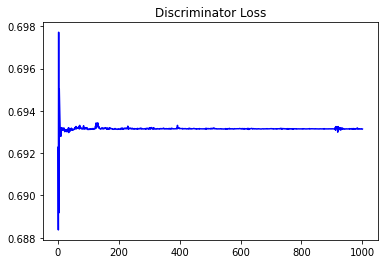

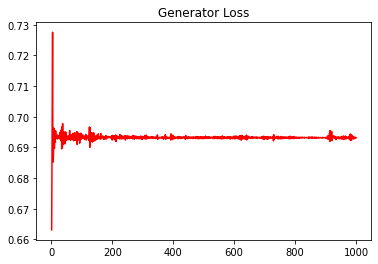

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.15929549791407507


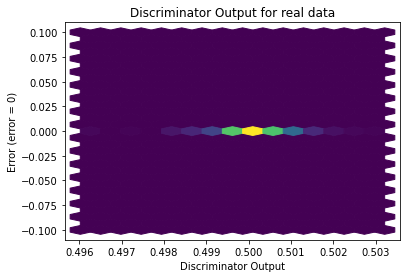

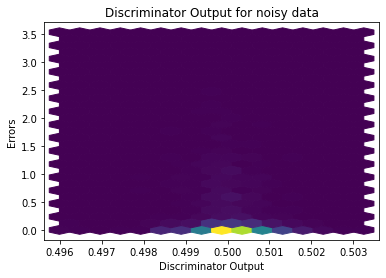

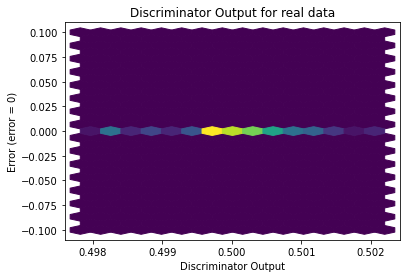

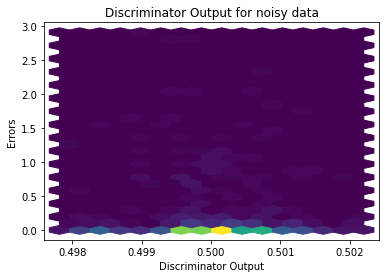

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


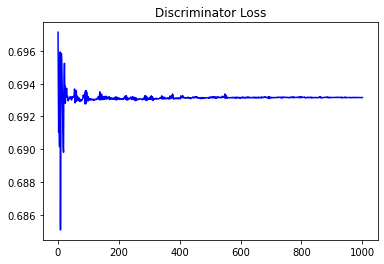

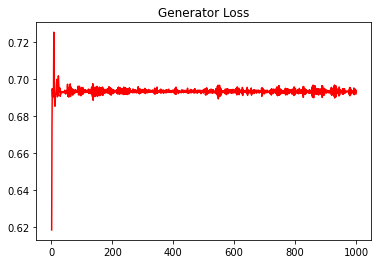

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.14478431716532314


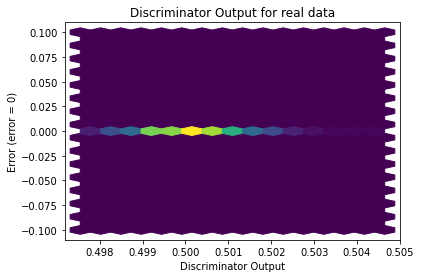

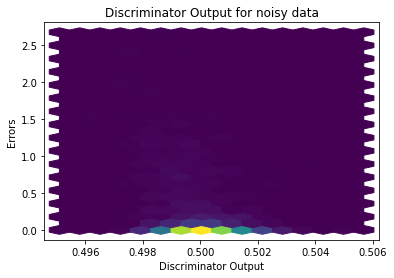

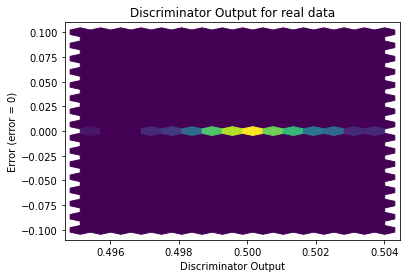

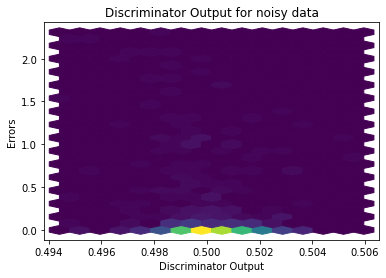

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1357]], requires_grad=True)
